This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/7_trees_randomforest_boosting/)

# REGRESSION TREE

In this notebook, the methods illustrated are basically the same as those presented in the case of classification (notebook N1_Classif_tree.ipynb), **except** the criterion for defining the best split : in this regression case, the best split search at each node is conducted to minimize a **Mean Square Error criterion**. Note that this applies for numerical data only. 

Let $N$ be the umber of samples in a set $S$. Splitting in two subsets will define the **partition** of $S$ into $\{ S_l, S_r \}$. The estimated variance or MSE of $S$ is 
$$ MSE(S) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y})^2 $$
where $\hat{y}=\frac{1}{N}\sum_{i=1}^N y_i$.

Assuming that the samples are elements of $\mathbb{R}^d $, one seeks the best threshold to apply on one of the $d$ components, to minimize
$$MSE(S_r,S_l) = \frac{n_r}{N}MSE(S_r)+ \frac{n_l}{N}MSE(S_l)$$ 

## A first simple example for data in $\mathbb{R}$

The number of point in the set is 629


Text(0, 0.5, 'y')

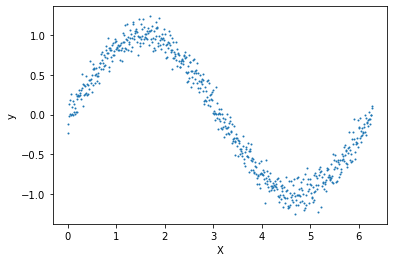

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Make a noisy a sine shape function 
#np.random.seed(0)
noise_std=.1
X=np.arange(0,2*np.pi,.01)[:,np.newaxis]
nx=np.random.randn(X.shape[0],1)*noise_std
y=np.sin(X)+np.random.randn(X.shape[0],1)*noise_std
print("The number of point in the set is {}".format(len(X)))

# changing y to observe the behaviour on linear regression 
# y= .5*X + np.random.randn(X.shape[0],1)*noise_std


plt.figure()
plt.scatter(X,y,s=1)
plt.xlabel('X')
plt.ylabel('y')


### Compute the decision tree for two different maximal depth. 
Other prameters are set to default. See
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

X=X.reshape(len(X),1) #necessary as DecistionTreeRegressor takes a 2D array in input

regr2 = DecisionTreeRegressor(max_depth=2, criterion='mse') 
regr2=regr2.fit(X,y)
N=4
regrN = DecisionTreeRegressor(max_depth=N, criterion='mse') 
regrN = regrN.fit(X,y)

### Visualize the predictions obtained for both regression trees

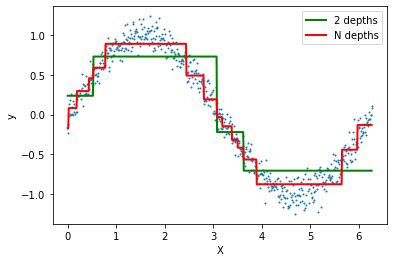

In [3]:
# Define a new set of inputs with the same range as X
X_test = np.arange(0.0, X.max(), 0.01)[:, np.newaxis] #alternate method, to get a 2D array for 2D array from a scalar time series
# use the computed trees to obtain prediction values
y_r2=regr2.predict(X_test)
y_rN=regrN.predict(X_test)

plt.scatter(X,y,s=1)
plt.plot(X_test,y_r2, color='green',label="2 depths", linewidth=2 )
plt.plot(X_test,y_rN, color='red', label="N depths",linewidth=2 )
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Questions
- How many different prediction values are defined by a tree of depth N?
- What is the average number of samples from the training set in each leave? (let N be the size of the training set)

## Setting the depth by using cross validation
https://scikit-learn.org/stable/modules/model_evaluation.html

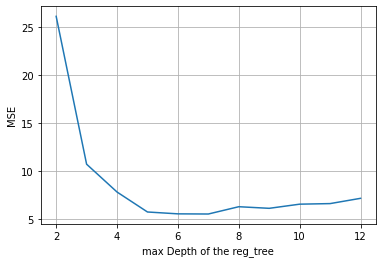

In [4]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.5, random_state=None)
depth=np.arange(2,13)

reg_MSE=[]
for N in depth:
    regrN = DecisionTreeRegressor(max_depth=N) 
    mserr=[]
    for train_index, test_index in cv.split(X):
        regrN=regrN.fit(X[train_index],y[train_index])
        y_pred = regrN.predict(X[test_index]); 
        y_t = y[test_index].ravel() # to force same dimensions as those of y_pred
        mserr.append(np.square(y_t-y_pred).sum())
        #print(mserr)
    
    reg_MSE.append(np.asarray(mserr).mean())

plt.plot(depth,reg_MSE)
plt.xlabel('max Depth of the reg_tree')
plt.ylabel ('MSE')
plt.grid()

## Exercice
- Determine the "optimal" depth to use to perform the best (MSE sense) tree based prediction 
- Change the noise power (set e.g. noise_std to take different values in the range $[.01;1]$ and study (plot) the obtained cross-validated "optimal depth" as a function of the noise power. 
- Interpret your findings
                          

## Exercize
- Change the SNR of the data set (by changing noise_std value). How does the optimal max_depth evolve when the SNR increases? (visualizing the data may help you to understand the behviour of this optimal max-depth parameter)